In [188]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/NIR')
sys.path.append('/home/kirilman/Projects/nir/nir/')

import myutils
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, minmax_scale

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
def read_data(start_ind, stop_ind):
    with open('kdd_test.txt','r') as file:
        data = []
        target = []
        for i,line in enumerate(file):
            if i == 0:
                continue
            elems = line.replace('\n','').split(',')
            data += [[float(x) for x in elems[start_ind:stop_ind]]]
            target += [elems[41]]
    return data, target

In [190]:
#frame = pd.read_csv('kdd_float.csv',index_col = None)
frame = pd.read_csv('kdd_test.csv')
frame.columns = range(0,42)
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [191]:
frame.dtypes

0       int64
1      object
2      object
3      object
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41     object
dtype: object

In [192]:
import gc
gc.collect()

185

In [193]:
frame.shape
print(len(frame[41][:100000].unique()))

20


11


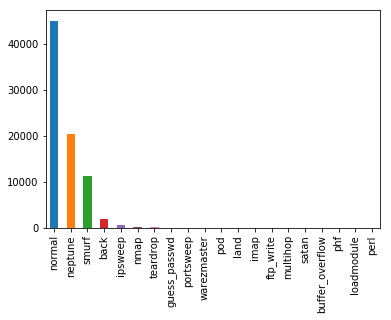

In [194]:
test_frame = frame[80000:100000]
frame = frame[:80000]
print(len(test_frame[41].unique()))
frame[41].value_counts().plot.bar()

20


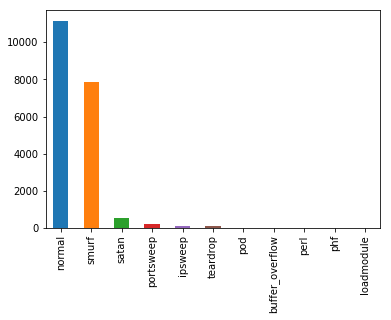

In [195]:
test_frame[41].value_counts().plot.bar()
print(len(frame[41].unique()))

In [196]:
# idx = [x for x in range(5,41)]
# idx = [34,35,36,37,38]
idx = [x for x in range(20,35)]

data = frame[idx]
target = frame[41]

test_data = test_frame[idx]
test_target = test_frame[41] 
print(target[:4])

0    normal
1    normal
2    normal
3    normal
Name: 41, dtype: object


In [197]:
data.dtypes

20      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
dtype: object

In [198]:
data.describe()

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,80000.0,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.0,0.002475,124.678363,81.914288,0.258527,0.258554,0.024798,0.026333,0.757433,0.020318,0.088918,180.988725,171.649113,0.707483,0.026666
std,0.0,0.049688,176.229138,173.977786,0.437325,0.437305,0.153457,0.153506,0.410225,0.063850,0.232765,100.104335,110.049010,0.424973,0.067679
min,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,74.000000,19.000000,0.070000,0.000000
50%,0.0,0.000000,15.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000
75%,0.0,0.000000,210.000000,20.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000
max,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000


In [199]:
data, target = read_data()
test_data = data[80000:100000]
test_target = target[80000:100000]

data = data[:80000]
target = target[:80000]

TypeError: read_data() missing 2 required positional arguments: 'start_ind' and 'stop_ind'

In [200]:
#нормализация
data = pd.DataFrame(minmax_scale(data))
test_data = pd.DataFrame(minmax_scale(test_data))

In [201]:
states = {}
for i,elem in enumerate(target.unique()):
    states[elem] = i
print(states)

y_train = []
for x in target:
    y_train+=[states[x]]
y_train = list(map(str,y_train))
y_train = list(map(myutils.rename_state,y_train))

print(y_train[:10])
x_train = data.values.tolist()
print(len(x_train), len(y_train))


{'normal': 0, 'buffer_overflow': 1, 'loadmodule': 2, 'perl': 3, 'neptune': 4, 'smurf': 5, 'guess_passwd': 6, 'pod': 7, 'teardrop': 8, 'portsweep': 9, 'ipsweep': 10, 'land': 11, 'ftp_write': 12, 'back': 13, 'imap': 14, 'satan': 15, 'phf': 16, 'nmap': 17, 'multihop': 18, 'warezmaster': 19}
['s0', 's0', 's0', 's0', 's0', 's0', 's0', 's0', 's0', 's0']
80000 80000


In [202]:
#Тестовая выборка
y_test = []
for x in test_target:
    y_test += [states[x]]

x_test = test_data.values.tolist()
print(x_test[:5])
print(len(x_test))
print(y_test[:5])

[[0.0, 0.0, 0.003913894324853229, 0.003913894324853229, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.007874015748031496, 1.0, 1.0, 0.0], [0.0, 0.0, 0.023483365949119372, 0.025440313111545987, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.15, 0.047244094488188976, 1.0, 1.0, 0.0], [0.0, 0.0, 0.043052837573385516, 0.04500978473581213, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.09, 0.08661417322834647, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0019569471624266144, 0.003913894324853229, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.007874015748031496, 1.0, 1.0, 0.0], [0.0, 0.0, 0.015655577299412915, 0.015655577299412915, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.03543307086614173, 1.0, 1.0, 0.0]]
20000
[0, 0, 0, 0, 0]


In [203]:
x_train[:1]

[[0.0,
  0.0,
  0.013725490196078431,
  0.013725490196078431,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.03529411764705882,
  0.03529411764705882,
  1.0,
  0.0]]

In [204]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = 20,X = [x_train],
                                       labels=[y_train],algorithm='labeled' )
model

TypeError: Cannot cast ufunc subtract output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

In [ ]:
y_pr = model.predict(x_test)
print(y_pr[:10])

In [127]:
np.sum(np.array(y_pr) == np.array(y_test))/len(y_pr)

/home/kirilman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


0.0

In [128]:
cov = [[0.5, -0.8], [2.4, 4.7]]
a = (np.random.randn(500, 2) + [10, -1.5]).dot( cov )

In [129]:
a = np.random.randn(5000,2)

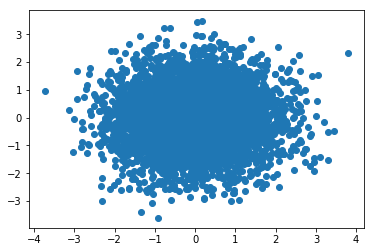

In [130]:
plt.scatter(a[:,0],a[:,1])

In [131]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = 1,X = [a])

In [132]:
model
import seaborn as sns

In [414]:
start_means[1]

[1, 0.0008]

(6000, 2)

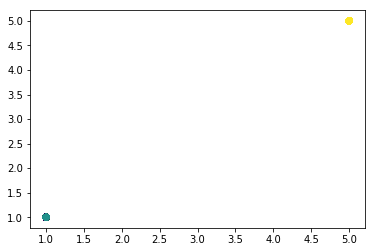

In [546]:
N =2
n_comp = 3
y_train = []
start_means = [[0.00001, 0.00003],
               [0.0005, 0.00008],
               [0.0001,   0.0002]]

start_means = [[1e-8, 2e-8],
               [1e-13,  0.5e-13],
               [4,    4]]

# start_means = [[0.00001, 0.00003],
#                [1,   0.0008],
#                [2,    0.2]]
data = np.zeros((0,N))
for j in range(20):
    for i in range(n_comp):
        mean = np.ones((N))+start_means[i]
        #print(mean.shape)
        #cov = np.eye(N,N)*np.random.uniform(0,0.0000000001)
        cov = np.eye(N,N)*np.random.uniform(0,1e-15)

        t = np.random.multivariate_normal(mean,cov,100)
        data = np.vstack((data,t))
        y_train += [i]*100
if N>=2:
    plt.scatter(data[:,0],data[:,1], c = y_train)
y_train = list(map(str,y_train))
y_train = list(map(myutils.rename_state, y_train))
data.shape

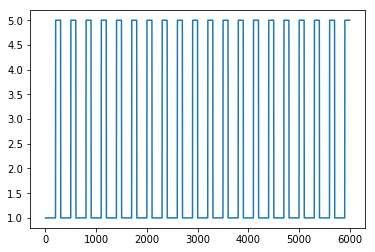

In [547]:
plt.plot(data[:,0],'')

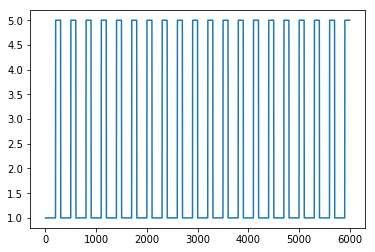

In [548]:
plt.plot(data[:,0],'')

In [549]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = n_comp,X = [data],
                                        labels = [y_train], algorithm = 'labeled')

# model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = n_comp,X = [data])
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "MultivariateGaussianDistribution",
                "parameters" : [
                    [
                        1.0380190193257433,
                        1.0380190290376448
                    ],
                    [
                        [
                            0.15063060189613822,
                            0.15063059150350178
                        ],
                        [
                            0.15063059150350178,
                            0.1506306011108653
                        ]

In [550]:
np.random.normal(N)

3.764052345967664

In [551]:
test = np.zeros((0,N))
label = []
for i in range(n_comp):
    #mean = np.ones((N))+(2*i+1)
    mean = np.ones((N))+start_means[i]
    
    cov = np.eye(N,N)*np.random.uniform(0,1e-9)
    
    t = np.random.multivariate_normal(mean,cov,100)
    #+np.random.normal(0,0.5,N)
    test = np.vstack((test,t))
    label +=[i]*100
test.shape

y_pr = model.predict(test)

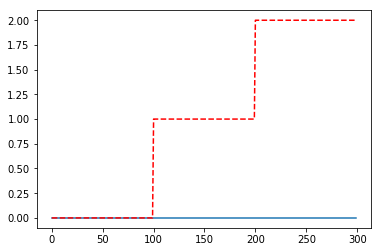

In [552]:
plt.plot(y_pr)
plt.plot(label,'r--')

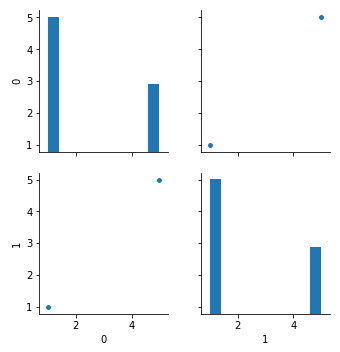

In [553]:
sns.pairplot(pd.DataFrame(data))

In [508]:
def rewrite_data():
    with open('kdd_float.csv','r') as input_file:
        with open('kdd_test.txt','w') as output_file:
            for line in input_file:
                output_file.write(line)
            output_file.close()
        input_file.close()

In [453]:
rewrite_data()

In [187]:
with open('kdd_float.csv','r') as input_file:
    for i in file:
        print(i); k+=1
        if k == 20:
            break
    file.close()

NameError: name 'file' is not defined

In [554]:
frame = pd.read_csv('kdd_test.csv')

ValueError: Invalid file path or buffer object type: <class 'type'>

In [69]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal
